In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Cleaned_Algerian_Dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [ ]:
# Drop the day month year feature
df = df.drop(['day','month','year'],axis=1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [ ]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [ ]:
# Encoding
df['Classes']= np.where(df['Classes'].str.contains('not fire'),0,1)

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [ ]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [ ]:
# Divide into Independent and Dependent Features
X = df.drop('FWI',axis=1)
y = df['FWI']

# Model Training

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape, X_test.shape

((194, 11), (49, 11))

In [ ]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Feature Selection Based on Correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


<Axes: >

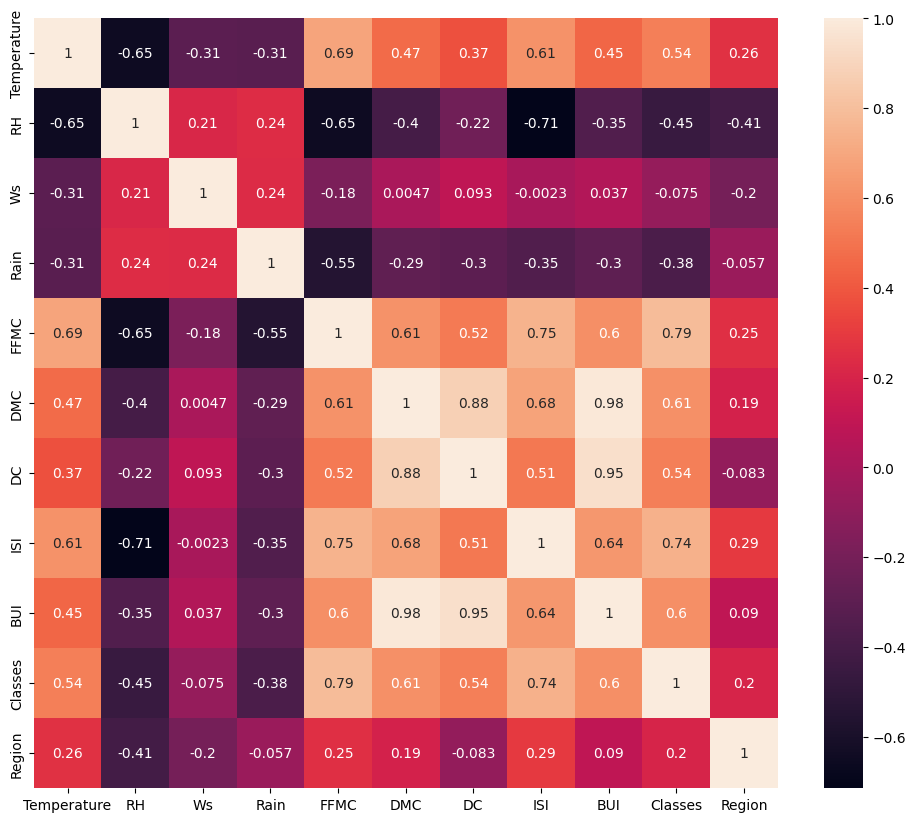

In [ ]:
# Check for multi-collinearity
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [ ]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


In [ ]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr


In [ ]:
# Threshod -> is decided by Domain Expertise
corr_features = correlation(X_train,0.85)
print(corr_features)

{'DC', 'BUI'}


In [ ]:
## Dopr the Features when correlation in more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape, X_test.shape

((194, 9), (49, 9))

# Feature Scaling OR Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.79648833,
        -1.14434427, -1.01036297],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  1.88757476,
         0.8738629 ,  0.98974332],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.19488798,
         0.8738629 ,  0.98974332],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.0972885 ,
        -1.14434427, -1.01036297],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.56868169,
         0.8738629 ,  0.98974332],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.88904223,
        -1.14434427, -1.01036297]])

# Box PLots to understand the Effects of Standard Scaler

Text(0.5, 1.0, 'X train After Scaling')

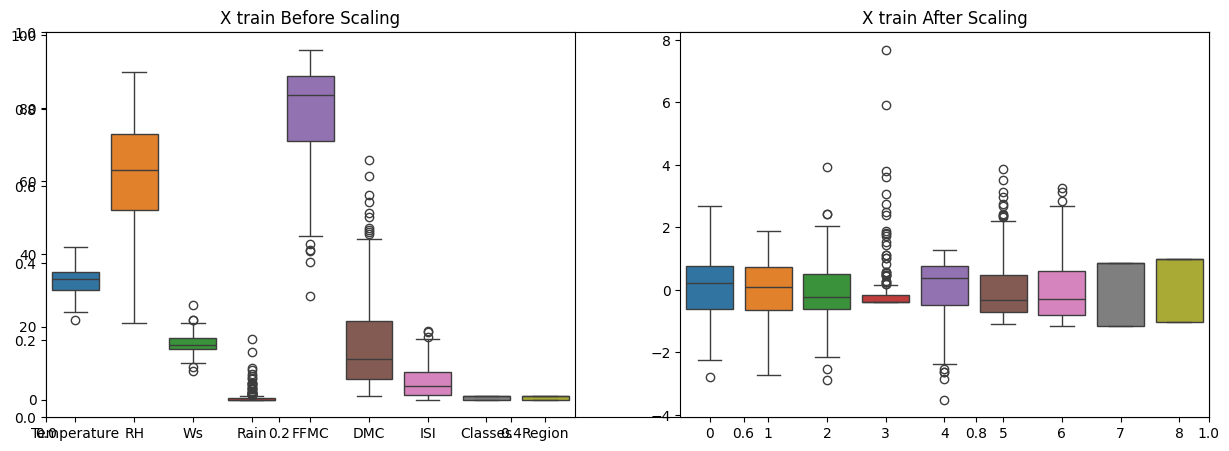

In [ ]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X train Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X train After Scaling")

# Linear Regression Model

MAE: 0.5049978694165687
R2 Score- Accuracy of the Model : 0.9805895859259882


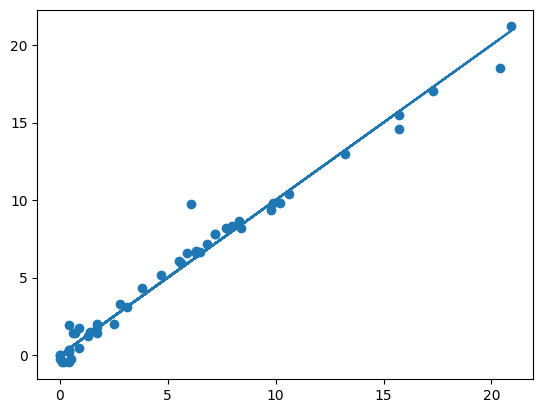

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f"MAE: {mae}")
print(f"R2 Score- Accuracy of the Model : {score}")
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test)

# Lasso Regression

MAE: 1.0093958923873407
R2 Score- Accuracy of the Model : 0.9430507350726562


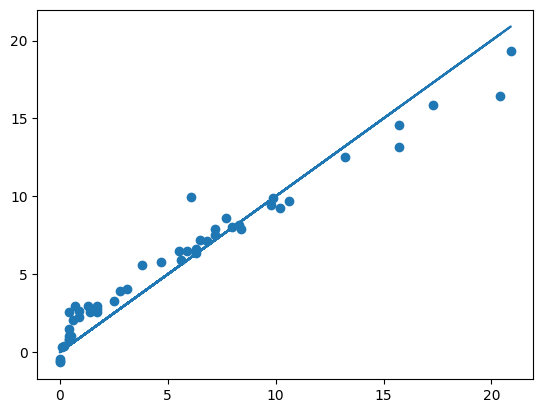

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso  = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f"MAE: {mae}")
print(f"R2 Score- Accuracy of the Model : {score}")
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test)

# Cross Validation Lasso

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)


LassoCV(cv=5)

MAE: 0.5556715031617872
R2 Score- Accuracy of the Model : 0.978328234520343


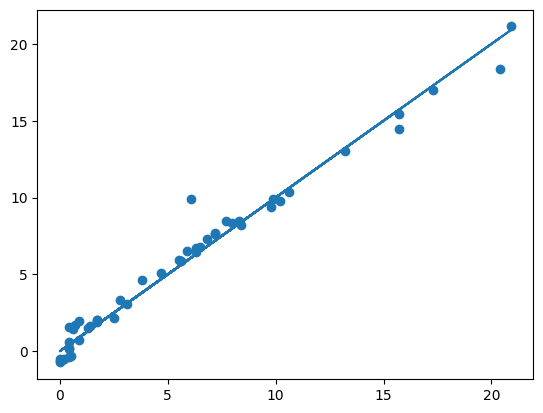

In [ ]:
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f"MAE: {mae}")
print(f"R2 Score- Accuracy of the Model : {score}")
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test)

In [ ]:
lassocv.alphas_

array([7.1563667 , 6.67405153, 6.2242428 , 5.80474966, 5.41352896,
       5.04867523, 4.70841142, 4.39108025, 4.09513613, 3.81913766,
       3.56174057, 3.32169117, 3.09782031, 2.88903759, 2.69432612,
       2.51273756, 2.34338746, 2.18545099, 2.0381589 , 1.90079382,
       1.77268667, 1.65321353, 1.54179247, 1.43788081, 1.34097246,
       1.2505954 , 1.16630946, 1.08770411, 1.01439649, 0.94602956,
       0.88227033, 0.82280827, 0.76735374, 0.71563667, 0.66740515,
       0.62242428, 0.58047497, 0.5413529 , 0.50486752, 0.47084114,
       0.43910802, 0.40951361, 0.38191377, 0.35617406, 0.33216912,
       0.30978203, 0.28890376, 0.26943261, 0.25127376, 0.23433875,
       0.2185451 , 0.20381589, 0.19007938, 0.17726867, 0.16532135,
       0.15417925, 0.14378808, 0.13409725, 0.12505954, 0.11663095,
       0.10877041, 0.10143965, 0.09460296, 0.08822703, 0.08228083,
       0.07673537, 0.07156367, 0.06674052, 0.06224243, 0.0580475 ,
       0.05413529, 0.05048675, 0.04708411, 0.0439108 , 0.04095

# Ridge Regression Model

MAE: 0.5192048325844797
R2 Score- Accuracy of the Model : 0.9801058063273599


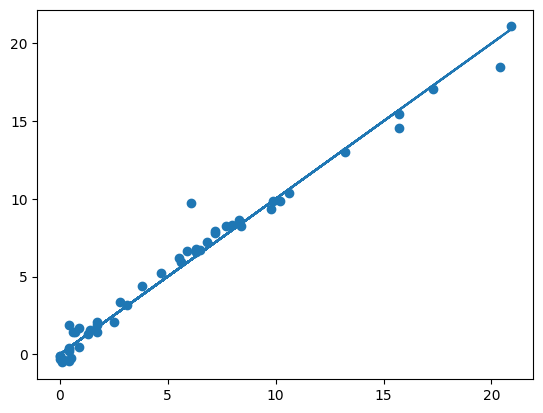

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f"MAE: {mae}")
print(f"R2 Score- Accuracy of the Model : {score}")
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test)

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)


RidgeCV(cv=5)

MAE: 0.5192048325844797
R2 Score- Accuracy of the Model : 0.9801058063273599


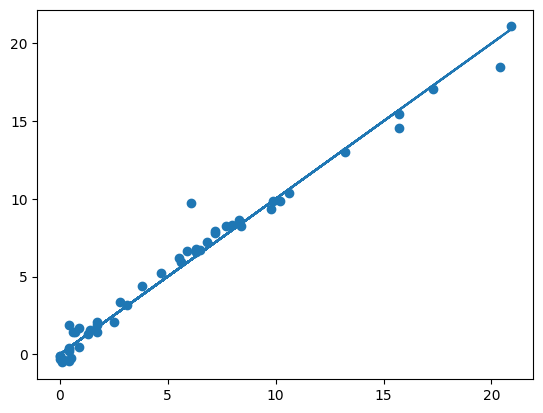

In [ ]:
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f"MAE: {mae}")
print(f"R2 Score- Accuracy of the Model : {score}")
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test)

In [ ]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

# Elastic net Regression Model

MAE: 1.6834416340136709
R2 Score- Accuracy of the Model : 0.8676961352267807


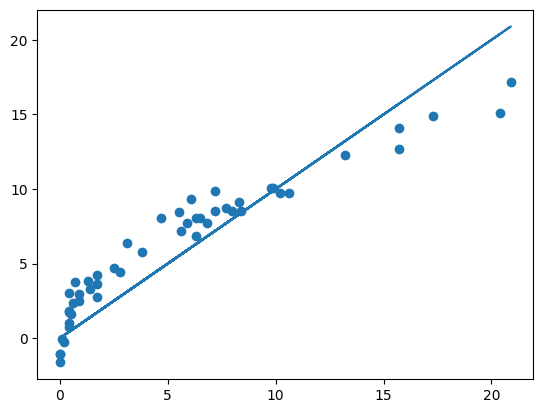

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_pred = elasticnet.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f"MAE: {mae}")
print(f"R2 Score- Accuracy of the Model : {score}")
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test)

MAE: 0.5710147088777218
R2 Score- Accuracy of the Model : 0.9781014571778188


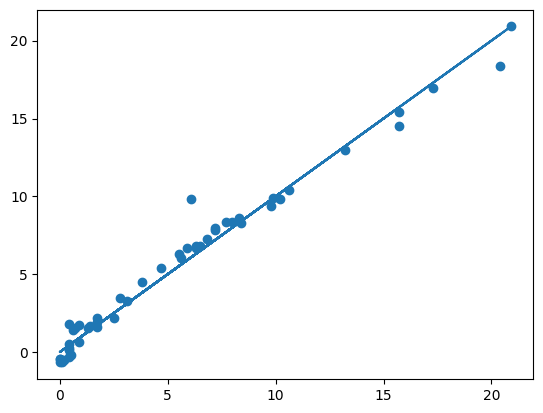

In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled,y_train)
y_pred = elasticnetcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f"MAE: {mae}")
print(f"R2 Score- Accuracy of the Model : {score}")
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test)


#### Pickle the Machine Learning Model and Preprocessing model i.e Standard Scaler

In [ ]:
linreg

LinearRegression()

In [ ]:
ridge

Ridge()

In [ ]:
lasso

Lasso()

In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))